# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.misc import derivative
from typing import Union, Callable
sns.set_theme()

s = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
A = np.random.randint(0, 100, size=(200, 50))
A

array([[94, 48, 82, ..., 32, 62,  6],
       [48, 11, 95, ..., 65, 38, 67],
       [ 5, 67, 21, ..., 56, 31, 49],
       ...,
       [13, 45, 16, ..., 60, 87, 95],
       [ 3, 96, 56, ..., 75, 69, 70],
       [78,  0, 32, ..., 30, 66, 43]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
B = np.transpose(np.random.permutation(np.transpose(A)))
A

array([[ 2, 42, 69, ..., 55, 26, 70],
       [ 9, 78, 59, ..., 60, 21, 95],
       [71, 53, 66, ..., 81, 39, 63],
       ...,
       [22, 52,  1, ..., 47, 86, 25],
       [ 0,  8, 52, ...,  8, 50, 33],
       [ 9, 49, 15, ..., 93, 97, 95]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [4]:
C = A[A[:,0:len(A[0]):2].sum(axis=1) > A[:,1:len(A[0]):2].mean()]
C

array([[ 2, 42, 69, ..., 55, 26, 70],
       [ 9, 78, 59, ..., 60, 21, 95],
       [71, 53, 66, ..., 81, 39, 63],
       ...,
       [22, 52,  1, ..., 47, 86, 25],
       [ 0,  8, 52, ...,  8, 50, 33],
       [ 9, 49, 15, ..., 93, 97, 95]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [5]:
i = np.argmax(A.max(axis=1) - A.min(axis=1))
i

2

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [6]:
D = np.argsort(np.argsort(A, axis=None)).reshape(A.shape) + 1
D


array([[ 223, 4275, 6870, ..., 5489, 2604, 7036],
       [ 885, 7844, 5895, ..., 5978, 2089, 9495],
       [7105, 5253, 6614, ..., 8124, 3952, 6315],
       ...,
       [2119, 5235,  149, ..., 4735, 8635, 2417],
       [  77,  781, 5225, ...,  806, 4969, 3283],
       [ 896, 4885, 1405, ..., 9378, 9792, 9539]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [84]:
E = (A - A.min(axis=1)[:, None]) / (A.max(axis=1)[:, None] - A.min(axis=1)[:, None])
E

array([[0.85263158, 0.66315789, 0.47368421, ..., 1.        , 0.50526316,
        0.34736842],
       [0.18681319, 0.81318681, 0.08791209, ..., 0.95604396, 0.        ,
        0.1978022 ],
       [0.19191919, 0.43434343, 0.04040404, ..., 0.61616162, 0.37373737,
        0.67676768],
       ...,
       [0.52083333, 0.60416667, 0.83333333, ..., 0.48958333, 0.26041667,
        0.80208333],
       [0.625     , 0.05208333, 0.125     , ..., 0.84375   , 0.61458333,
        0.04166667],
       [0.18367347, 0.47959184, 0.95918367, ..., 0.7244898 , 0.03061224,
        0.58163265]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
F = A.reshape(1, len(A), len(A[0]))
new_arr = np.concatenate((F, 2*F, 3*F, 4*F, 5*F, 6*F, 7*F, 8*F, 9*F, 10*F))
print(new_arr.shape)
new_arr

(10, 200, 50)


array([[[  2,  42,  69, ...,  55,  26,  70],
        [  9,  78,  59, ...,  60,  21,  95],
        [ 71,  53,  66, ...,  81,  39,  63],
        ...,
        [ 22,  52,   1, ...,  47,  86,  25],
        [  0,   8,  52, ...,   8,  50,  33],
        [  9,  49,  15, ...,  93,  97,  95]],

       [[  4,  84, 138, ..., 110,  52, 140],
        [ 18, 156, 118, ..., 120,  42, 190],
        [142, 106, 132, ..., 162,  78, 126],
        ...,
        [ 44, 104,   2, ...,  94, 172,  50],
        [  0,  16, 104, ...,  16, 100,  66],
        [ 18,  98,  30, ..., 186, 194, 190]],

       [[  6, 126, 207, ..., 165,  78, 210],
        [ 27, 234, 177, ..., 180,  63, 285],
        [213, 159, 198, ..., 243, 117, 189],
        ...,
        [ 66, 156,   3, ..., 141, 258,  75],
        [  0,  24, 156, ...,  24, 150,  99],
        [ 27, 147,  45, ..., 279, 291, 285]],

       ...,

       [[ 16, 336, 552, ..., 440, 208, 560],
        [ 72, 624, 472, ..., 480, 168, 760],
        [568, 424, 528, ..., 648, 312, 504

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [86]:
G = np.concatenate((A[:,0:len(A[0]):2], A[:,1:len(A[0]):2]), axis=1)
G

array([[82, 46,  6, ...,  1, 96, 34],
       [20, 11, 46, ..., 33, 90, 21],
       [19,  4, 29, ..., 82, 61, 67],
       ...,
       [52, 82, 95, ..., 41, 49, 79],
       [63, 15, 38, ..., 52, 84,  7],
       [18, 94, 94, ..., 98, 71, 57]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [87]:
len(A[np.all(A > 5, axis=1)])

8

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [88]:
np.mean(np.split(A, 10), axis=0)

array([[61.7, 37.1, 44.2, 44.9, 45.1, 43.3, 50.2, 48.6, 47.6, 46.3, 49.4,
        49.4, 46.2, 53.8, 33.4, 67.7, 57. , 46.8, 55.1, 31. , 43.9, 35.4,
        50.1, 42.8, 50.5, 32.8, 61.7, 57.7, 51.1, 33.7, 56.8, 52.7, 53.7,
        46.9, 61.5, 41.7, 76.8, 41.7, 39.2, 61.5, 55.1, 60.4, 47.5, 48.7,
        57.5, 51.9, 47.3, 49.2, 55.5, 51.7],
       [36.6, 60.2, 47.1, 62.5, 59.6, 32.7, 42.9, 42.7, 51.5, 45. , 61.3,
        59.1, 49.5, 40.8, 37.6, 40.8, 18.4, 29.6, 41.3, 55.4, 51.8, 54.2,
        50.2, 55.7, 44.2, 42.3, 41.4, 66. , 35.1, 33. , 36.4, 37.3, 33.2,
        59.1, 49.2, 58.5, 45.5, 42.5, 49. , 49.1, 38.3, 44.1, 46.3, 37.9,
        52.8, 40. , 47.3, 54. , 31.8, 42.8],
       [46.7, 58.7, 40.6, 42.8, 51.4, 35.1, 43.2, 70.3, 35.5, 54.7, 42.3,
        49.1, 56.2, 45.3, 46.4, 50.6, 42.6, 45.6, 57. , 43.9, 50.3, 32.9,
        56.3, 47.4, 48.8, 50. , 58.5, 52.3, 45.8, 66.1, 60.4, 47.4, 61.1,
        48.1, 53.9, 41.1, 42.6, 50.6, 47.8, 33.7, 37.1, 54.6, 35.5, 42.8,
        39. , 61.6, 58

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [89]:
_, ind = np.unique(A, return_index=True)
H = A.reshape((1, len(A) * len(A[0])))
H[0][np.sort(ind)]

array([82, 64, 46, 12,  6, 74, 41, 51, 62, 69, 88, 20, 45, 42, 91,  1, 21,
        9, 67, 58, 40, 87, 60, 93, 31, 13, 84, 70, 68, 81, 61, 15, 96, 49,
       34, 77, 11, 55,  7,  4, 33, 17, 38, 78, 66, 37, 36, 30,  8, 44, 47,
        5, 92, 56, 26, 18, 63, 94, 72, 43, 76, 80, 32, 90,  3, 19, 29, 35,
        0, 79, 95, 89, 25, 99, 57, 28, 50, 59, 85, 54, 23, 86, 75, 24, 73,
       39, 27, 71, 48, 65, 16, 14, 98, 10, 53, 22, 52, 83,  2, 97])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [90]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)


array([204.53468239, 195.50965782, 189.09454328, 178.89372907,
       212.38833843, 200.61105727, 222.45302043, 208.6669267 ,
       222.78363113, 218.87979875, 193.09154901, 195.83486998,
       181.1664326 , 228.57656551, 182.69678788, 203.98964753,
       188.61886518, 190.53841161, 204.18828639, 209.27060544,
       206.98711627, 181.54034345, 202.57671707, 189.30886482,
       200.10851131, 208.14652603, 219.64877942, 221.11355974,
       203.46733472, 206.08264434, 207.07862347, 199.59806186,
       194.70933799, 204.07833373, 204.6491053 , 225.79567378,
       200.60958676, 196.13937978, 191.68817465, 218.12119636,
       202.50700309, 196.22396974, 209.83061335, 204.08541423,
       210.60630641, 209.32423725, 197.38692029, 193.72244656,
       190.02146274, 217.29640195, 197.38517244, 205.74835674,
       212.56447563, 205.89765977, 207.8793311 , 190.7518186 ,
       198.15414782, 194.4961087 , 200.84789344, 188.0203348 ,
       210.9707712 , 195.64548628, 215.41227054, 196.32

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [93]:
np.where(A < 50, A * 2, A * 3)

array([[246, 192,  92, ..., 288,  98,  68],
       [ 40, 231,  22, ..., 270,   6,  42],
       [ 38,  86,   8, ..., 183,  74, 201],
       ...,
       [156, 180, 246, ...,  98,  54, 237],
       [189,  16,  30, ..., 252, 186,  14],
       [ 36,  94, 282, ..., 213,   6, 171]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [113]:
I1 = np.convolve(A.reshape((1, len(A) * len(A[0])))[0], np.ones(3), 'valid') / 3
I2 = np.convolve(A.reshape((1, len(A) * len(A[0])))[0], np.ones(5), 'valid') / 5
I3 = np.convolve(A.reshape((1, len(A) * len(A[0])))[0], np.ones(10), 'valid') / 10
I2 = np.concatenate((I2,  np.zeros(I1.shape[0] - I2.shape[0])))
I3 = np.concatenate((I3,  np.zeros(I1.shape[0] - I3.shape[0])))
I1 + I2 + I3 

array([156.7       , 132.36666667, 104.03333333, ..., 136.8       ,
        46.33333333,  43.66666667])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


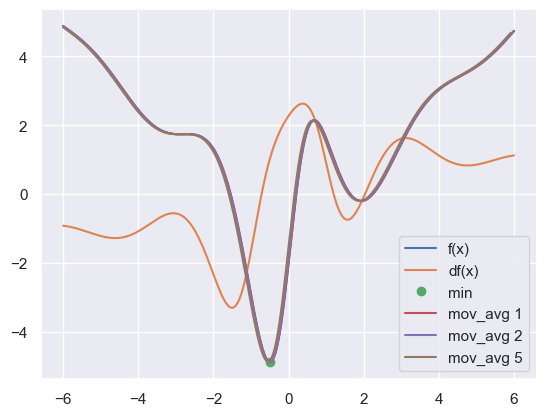

In [11]:
def f(x: np.ndarray) -> np.ndarray:
    return (5*np.sin(2*x) - np.cos(x)**2 - 1 + np.abs(x)**3 - x**2) / (x**2 + 1)

def df(f: Callable[[np.ndarray], np.ndarray] , x: np.ndarray) -> np.ndarray:
    return derivative(f, x)

def moving_average(x: np.ndarray, n: int) -> np.ndarray:
    return np.convolve(x, np.ones(n)/n, mode='valid')

x = np.linspace(-6, 6, 500)
y = f(x)
dy = df(f, x)
plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='df(x)')

min = sp.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = min[0][0], min[1]
plt.plot(x_min, y_min, 'o', label="min") 

y1, y2, y5 = moving_average(y, 1), moving_average(y, 2), moving_average(y, 5)
plt.plot(x, y1, label="mov_avg 1")
plt.plot(x[:len(y2)], y2, label="mov_avg 2")
plt.plot(x[:len(y5)], y5, label="mov_avg 5")


plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [28]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
%timeit sample([50, 3, 1, 7, 20], 300)   

795 µs ± 122 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [25]:
def my_sample(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    return np.random.choice(np.arange(len(x)), size=c, p=x/np.sum(x))

%timeit my_sample(np.array([50, 3, 1, 7, 20]), 300) 

136 µs ± 6.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Алгоритм, написанный на numpy баботает быстрее.
Проведем проверку идентичности алгоритмов с помощью t-критерия Стьюдента для проверки равенства матожидания выборок, а также теста Колмогорова-Смирнова для проверки равны ли распределения выборок.

In [67]:
from scipy.stats import ttest_ind
samples1 = sample([50, 3, 1, 7, 20, 4, 25, 37, 82], 1000)
samples2 = list(my_sample([50, 3, 1, 7, 20, 4, 25, 37, 82], 1000))
stat, p = ttest_ind(samples1, samples2)
print(stat, p)

from scipy.stats import kstest
corr, p = kstest(samples1, samples2)
print(corr, p)

-0.09371346908410488 0.9253461667277948
0.026 0.8881734182535203


p-значение и там и там > 0.05, следовательно матожидания и распределения равны.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [41]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

%timeit walk(10_000)

6.63 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [42]:
def numpy_walk(n: int):
    return np.random.choice(np.array([-3, -1, 0, 2, 3]), size=n).sum()

%timeit numpy_walk(10_000)

243 µs ± 890 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Видно, что реализованный на numpy алгоритм работает намного быстрее

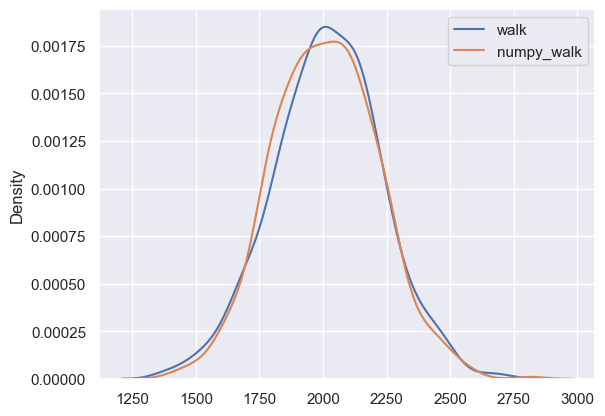

In [43]:
sns.kdeplot(data=[walk(10000) for _ in range(700)],  label='walk')
sns.kdeplot(data=[numpy_walk(10000) for _ in range(700)],  label='numpy_walk')
plt.legend()
plt.show()

Графики очень схожи.

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [44]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


-0.09337104352028398

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [68]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [48]:
import taichi as ti

ti.init(arch=ti.cpu)

@ti.kernel
def strange_conv_taichi(a: ti.types.ndarray()) -> ti.float64:
    x = a.shape[0]
    y = a.shape[1]
    t = 1.
    for y in ti.ndrange(y - 5):
        for x in ti.ndrange(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

[Taichi] version 1.4.0, llvm 15.0.1, commit fbe92fd8, win, python 3.10.8


c:\Users\yuryp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Taichi] Starting on arch=x64


In [70]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray['double', ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    cdef double c = 0.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [71]:
%%timeit
strange_conv(a)

32.3 s ± 2.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%%timeit
strange_conv_taichi(a)

650 ms ± 68.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%%timeit
strange_conv_cython(a)

183 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Оптимизированная с помощью Taichi функция работает в 50 раз быстрее.

Оптимизированная с помощью Cython функция работает в 175 раз быстрее.